In [2]:
import matplotlib.pyplot as plt
import matplotlib as mlb
import numpy as np


### Table of Contents

* [Basic](#basic)
* [Legend](#legend)
* [Time Series - Date Index](#series_date)
* [Large scale](#scale)
* [Line Types](#linetype)
* [Look and Feel](#style)
* [Subplot](#subplot)
    * [Subplot Adjust](#adjust)
* [Horizontal Line](#axhline)
* [Colors](#colors)
* [Error Bars](#errorbars)
* [Color Bars](#colorbars)
* [Animation](#anim)
    

    


<br><br>

<font size="5" color="maroon">Basic range vs linspace</font><a class="anchor" id="basic"></a>


<br><br>

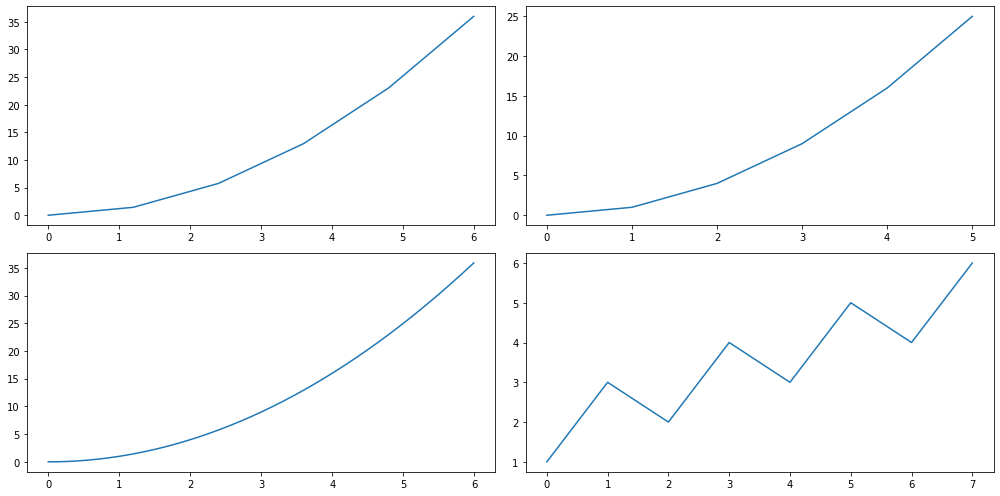

In [2]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, tight_layout=True, figsize=(14, 7))


# linspace is the number of steps
x = np.linspace(0,6,6)     
ax[0,0].plot(x, [x**2 for x in x])


# range x = 0,1,2,3,4, 5
x = range(6) 
ax[0,1].plot(x, [x**2 for x in x])

# arange, specify the size of the interval

import numpy as np 
x = np.arange(0.0, 6.0, 0.01) 
ax[1,0].plot(x, [x**2 for x in x])

# linspace, specify


# nothing, x is infered to be 0 to length of array
ax[1,1].plot([1, 3, 2, 4,3,5,4,6])
plt.show()


<br><br>

<font size="5" color="maroon">Legend</font><a class="anchor" id="legend"></a>


<br><br>

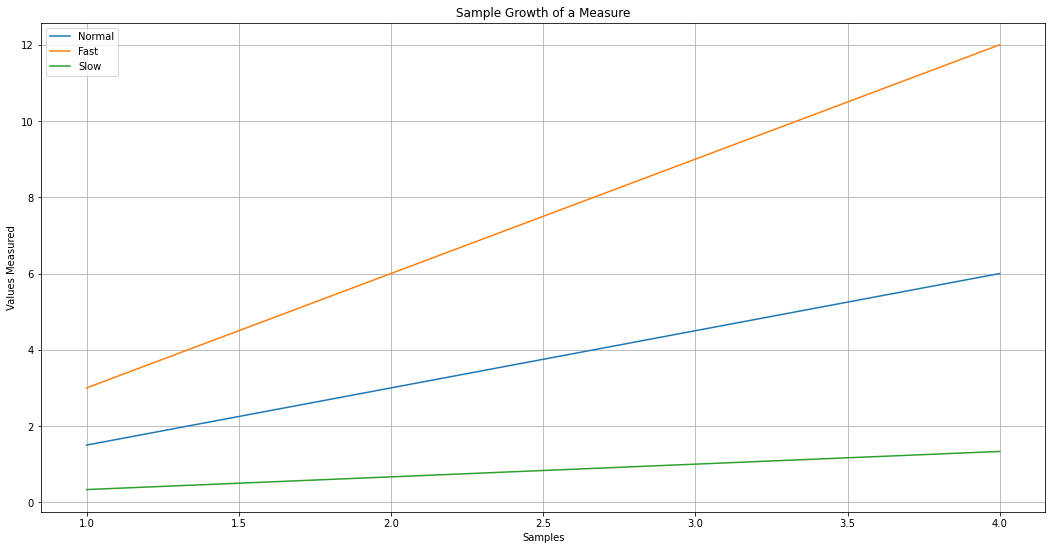

In [3]:
x = np.arange(1, 5)
plt.figure(figsize=(18, 9))      
plt.plot(x, x*1.5, label='Normal')
plt.plot(x, x*3.0, label='Fast')
plt.plot(x, x/3.0, label='Slow')

plt.grid(True)

plt.title('Sample Growth of a Measure')

plt.xlabel('Samples')
plt.ylabel('Values Measured')

plt.legend(loc='upper left')

# plt.subplots_adjust(top=.4, bottom=0.1)   # if you want to squoosh it, hard to see how this helps
plt.show()

<br><br>

<font size="5" color="maroon">Time Series - Date Index</font><a class="anchor" id="series_date"></a>


<br><br>

When you plot from an index, just reference the index function. 

<br>

[*********************100%***********************]  1 of 1 completed


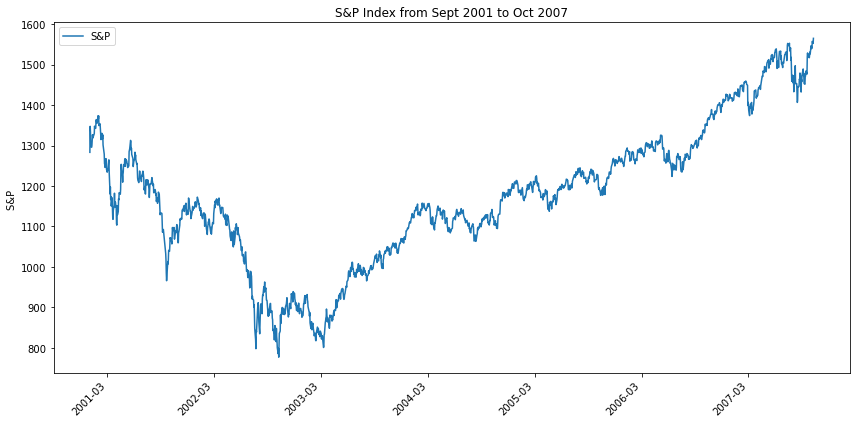

In [3]:
import yfinance as yf

seven_years_df = yf.download("^GSPC", start="2001-1-01", end="2007-10-10")
months_3_Loc = mlb.dates.MonthLocator(interval=12)
xFmt = mlb.dates.DateFormatter('%Y-%m')

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, tight_layout=True, figsize=(12, 6))

ax.plot_date(seven_years_df.index,seven_years_df['Adj Close'].values , '-' , label='S&P')
# ax.plot_date(seven_years_df.index,seven_years_df['KF_mean'].values , '-', label='Prediction' )

ax.xaxis.set_major_locator(months_3_Loc) 
ax.xaxis.set_minor_formatter(xFmt)  
ax.set(ylabel="S&P ", xlabel='')
ax.set_title('S&P Index from Sept 2001 to Oct 2007')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # have to force the rotation here

plt.xticks(rotation = 45, ha='right') 

plt.legend(loc='upper left')
plt.show()

<br><br>

<font size="5" color="maroon">Large scale</font><a class="anchor" id="scale"></a>


<br><br>

If you have an issue with a graph with a large scale, it may help to omit a portion of it. The graph on the right does a much better job displaying how the function looks. 

<br>

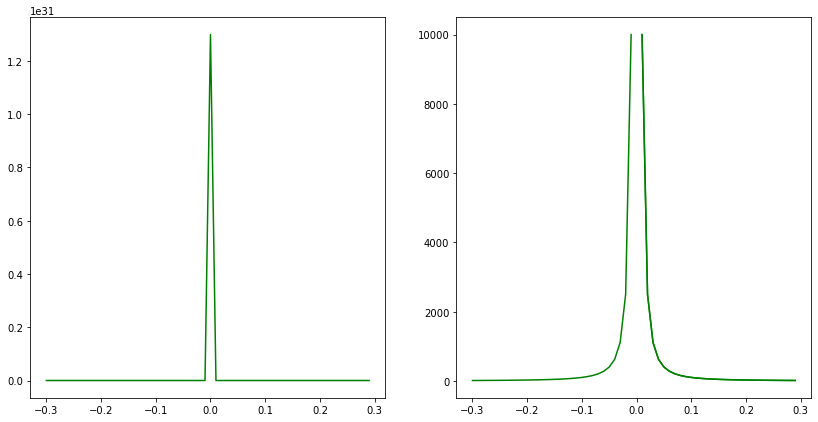

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

def eqn1(x):
  return 1/(x**2)


X = np.arange(-.3, .3, .01)
Y = eqn1(X)
ax[0].plot(X, Y,'-',color='green')

X1 = np.arange(-.3, -.009 , .01)
Y1 = eqn1(X1)
X2 = np.arange(.01, .3 , .01)
Y2 = eqn1(X2)
plt.plot
plt.plot(X2, Y2,'-',color='green')

ax[1].plot(X1, Y1,'-',color='green')
ax[1].plot(X2, Y2,'-',color='green')

plt.show()



<br><br>

<font size="5" color="maroon">Line Types</font><a class="anchor" id="linetypes"></a>


<br><br>


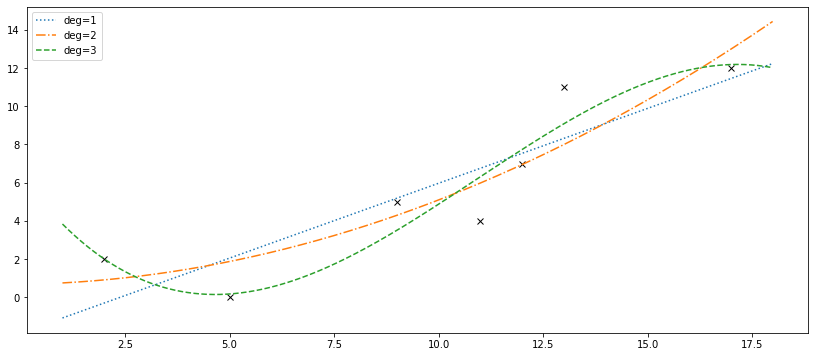

In [5]:
# the known points set
data = [[2,2],[5,0],[9,5],[11,4],[12,7],[13,11],[17,12]]

# we extract the X and Y components from previous points
x, y = zip(*data)

plt.figure(figsize=(14, 6))   
# plot the data points with a black cross
plt.plot(x, y, 'kx')
   

x2 = np.arange(min(x)-1, max(x)+1, .01)   #  1,  1.01,  1.02, ...17.98, 17.99]

# lines styles for the polynomials
styles = [':', '-.', '--']

# getting style and count one at time
for d, style in enumerate(styles):
    # degree of the polynomial
    deg = d + 1
    # calculate the coefficients of the fitting polynomial
    c = np.polyfit(x, y, deg)   # when deg=2, 2 coefficients are returned when deg=3 then 3 are returned, etc..

    y2 = np.polyval(c, x2)
    #  note deg is 1,2,3
    plt.plot(x2, y2, label="deg=%d" % deg, linestyle=style)

plt.legend(loc='upper left')
plt.show()

<br><br>

<font size="5" color="maroon">Look and Feel</font><a class="anchor" id="style"></a>


<br><br>

Looking for a certain style ? Try style.context...

<br>

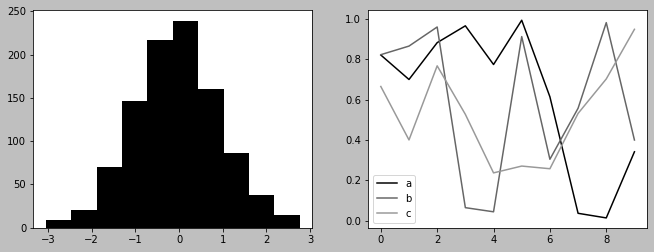

In [6]:
def hist_and_lines():
   np.random.seed(0)
   fig, ax = plt.subplots(1, 2, figsize=(11, 4))
   ax[0].hist(np.random.randn(1000))
   for i in range(3):
       ax[1].plot(np.random.rand(10))
   ax[1].legend(['a', 'b', 'c'], loc='lower left')


with plt.style.context('grayscale'):
            hist_and_lines()           

<br><br>

<font size="5" color="maroon">Subplot</font><a class="anchor" id="subplot"></a>


<br><br>

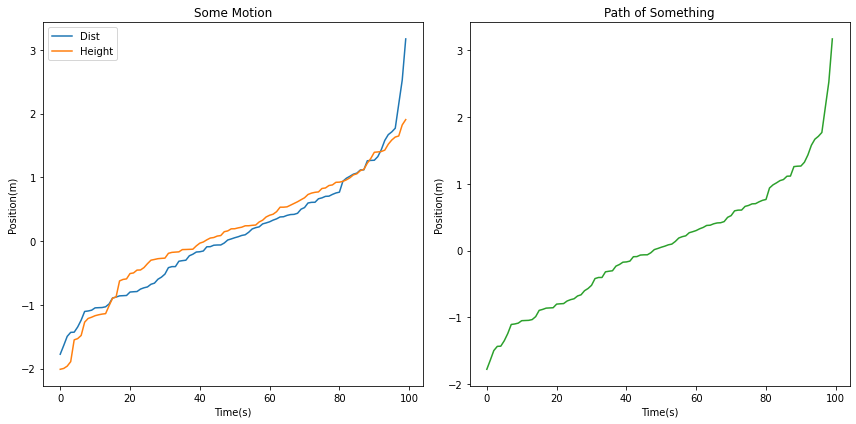

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(12, 6))

xs = range(100)
ys = np.sort(np.random.randn(100))
zs = np.sort(np.random.randn(100))


ax[0].plot(xs,ys)
ax[0].plot(xs,zs)


ax[0].legend(['Dist','Height'])
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Position(m)')        
ax[0].set_title('Some Motion')

ax[1].plot(xs, ys, color='C2')

ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Position(m)')        
ax[1].set_title('Path of Something')

plt.show()    # this only helps to supress the occassional matplotlib messages

<br><br>

<font size="5" color="maroon">Subplot Adjust</font><a class="anchor" id="adjust"></a>


<br><br>

subplot_adjust can be useful to squoosh the size of a single plot

<br><br>

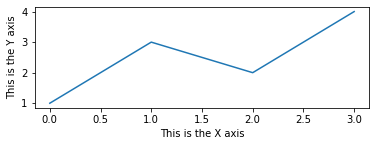

In [8]:
plt.plot([1, 3, 2, 4])
plt.xlabel('This is the X axis')
plt.ylabel('This is the Y axis')
plt.subplots_adjust(bottom=0.53)
plt.show()

<br><br>

<font size="5" color="maroon">Horizontal Line</font><a class="anchor" id="axhline"></a>


<br><br>

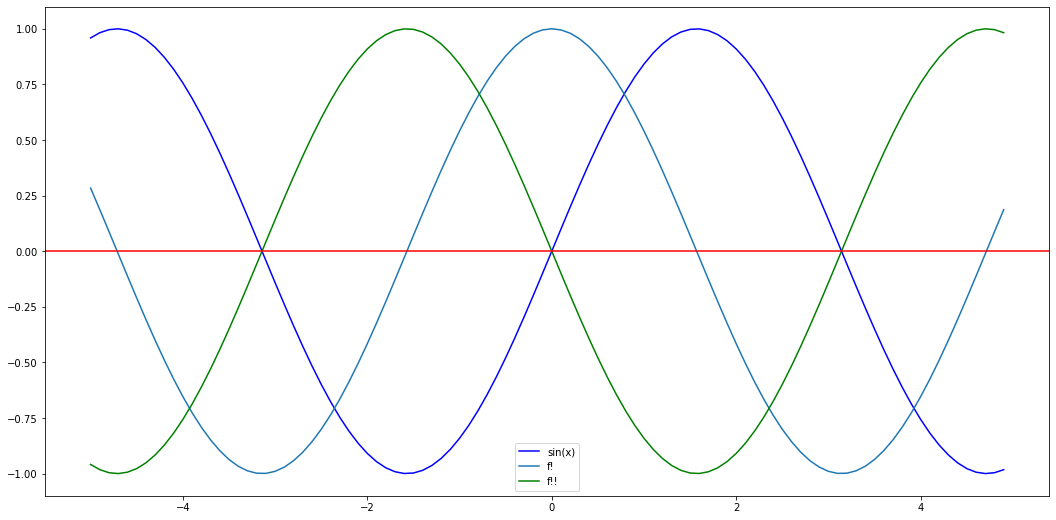

In [9]:
# note th use of axhline 
import math

x = np.arange(-5, 5 , .1)

eqn1 = np.vectorize(math.sin)  # vectorize is required to avoid scalar/array error
eqn2 = np.vectorize(math.cos)

Y1 = eqn1(x)
Y2 = eqn2(x)
Y3 = -1 * Y1         # derivative of cos X

plt_1 = plt.figure(figsize=(18, 9))
plt.plot(x, Y1, color= 'blue')
plt.plot(x, Y2)
plt.plot(x, Y3, color='green')
plt.axhline(0, color='red')

plt.legend(['sin(x)','f!', 'f!!'])
plt.show()

<br><br>

<font size="5" color="maroon">Colors</font><a class="anchor" id="colors"></a>

<br><br>

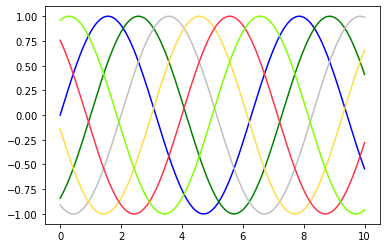

In [10]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

<br><br>

<font size="5" color="maroon">Error Bars</font><a class="anchor" id="errorbars"></a>


<br><br>

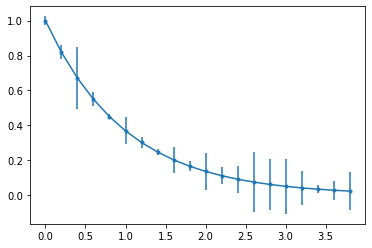

In [11]:
# error bar example.. see Advanced for more
x = np.arange(0, 4, 0.2)
y = np.exp(-x)
e1 = 0.1 * np.abs(np.random.randn(len(y)))
plt.errorbar(x, y, yerr=e1, fmt='.-')
plt.show()

<br><br>

<font size="5" color="maroon">Color Bars</font><a class="anchor" id="colorbars"></a>


<br><br>

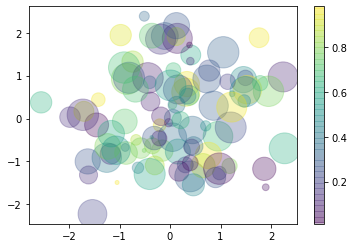

In [12]:

# note the use of sizes, and the colorbar !

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
                   cmap='viridis')
plt.colorbar();  # show color scale

<br><br>

<font size="5" color="maroon">Animation</font><a class="anchor" id="anim"></a>


<br><br>

<IPython.core.display.Javascript object>


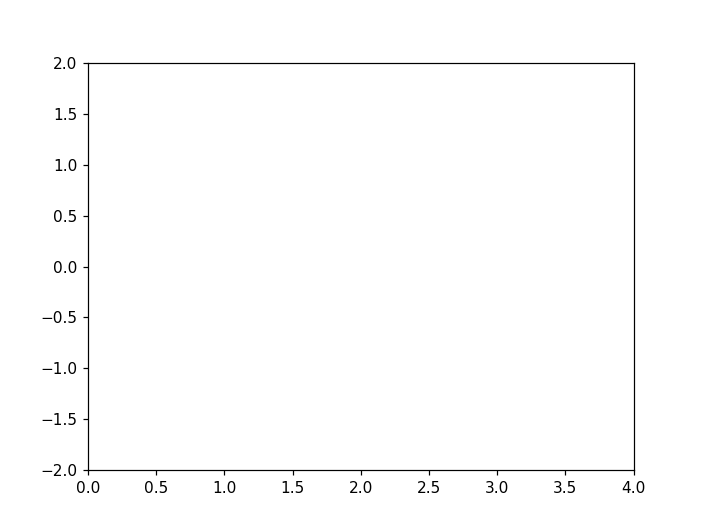

MovieWriter ffmpeg unavailable; using Pillow instead.


In [13]:
%matplotlib notebook

from matplotlib.animation import FuncAnimation 
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 4), 
                ylim =(-2, 2)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    x = np.linspace(0, 4, 1000)
   
    # plots a sine graph
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
      
    return line,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = 200, interval = 20, blit = True)

anim.save('continuousSineWave.gif',  fps = 30)